# Iris Data Classification
This project is meant as a practice data science project. Here is my take on this classification problem. <br />
The source of the data is https://archive.ics.uci.edu/ml/datasets/Iris <br />
The data consists the following features (in the following order): sepal length (cm), sepal width (cm), petal length (cm), petal width (cm). The output is supposed to be one of *Iris-setosa*, *Iris-versicolor*, *Iris-virginica*. 

In [40]:
import pandas as pd

In [2]:
# Read the data using pandas.read_table ()
input_file_path = "iris.data"
full_data = pd.read_table(input_file_path, sep = ",", header = None)

In [3]:
# Make sure that the data is read correctly
print(full_data.head(5))
print(full_data.tail(5))

     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa
       0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica


In [4]:
# Check for null values (if any)
full_data.isnull().values.any()

False

In [5]:
# Make sure that all of the data is read into the dataframe
full_data.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Note that there are no negative values in any column, which is good, as it does not make sense for any of the measuremenets t be negative. 

Before diving into the problem itself, let us explore the domain area first. It is important to obtain domain knowledge to make educated guesses as to what features might be discriminatory (most useful for classifying). <br />
Here are a few links to explore: <br />
https://en.wikipedia.org/wiki/Iris_setosa <br />
https://en.wikipedia.org/wiki/Iris_versicolor <br />
https://en.wikipedia.org/wiki/Iris_virginica <br />

It is also important to understand what features you are given. In our case, we are given with features like petal/sepal lengths and widths. For those who are not familiar with what petal and sepal are, here is a visual explanation: <br />
<img src="Petal-sepal.jpg">

Currently, I might have an assumption that petals of *Iris virginica* are wider than those of *Iris setosa*. Petals of both of these kinds are longer than those of *Iris versicolor*. Let us explore any correlations in the data. 

In [6]:
full_setosa = full_data[full_data[4] == "Iris-setosa"]
full_virginica = full_data[full_data[4] == "Iris-virginica"]
full_versicolor = full_data[full_data[4] == "Iris-versicolor"]

In [7]:
full_setosa.describe()

,0,1,2,3
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [8]:
full_virginica.describe()

,0,1,2,3
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


In [9]:
full_versicolor.describe()

,0,1,2,3
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


It would not be completely fair to extract insights (e.g. in terms of sepal: *Iris virginica* has the longest sepal, followed by *Iris versicolor*; but its width is similar to that of *Iris versicolor* and it's narrower than that of *Iris setosa*) from the above full data, so let us split the data into training and testing sets. Then we would like to infer some patterns from the training data, train an appropriate machine learning model, then test it on our testing dataset. <br />
I will split the data in such a way that all types occur the same number of times. 

In [86]:
from sklearn.model_selection import train_test_split
X = full_data.drop(4, axis = 1) #[:, full_data.columns != 4]
y = full_data.loc[:, 4]

test_ratio = 0.3

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = test_ratio)

In [87]:
# Ensure correct shapes now
print(train_X.shape) # Should be train_ratio * 150
print(test_X.shape) # Should be test_ratio * 150
print(train_y.shape)
print(test_y.shape)

(105, 4)
(45, 4)
(105,)
(45,)


We know have our training data that we can use to train the algorithm. But before that, let us delve into possible connections between features and the output. Let us use different visualization tools or present data in a nice tabular format that is easy to understand.

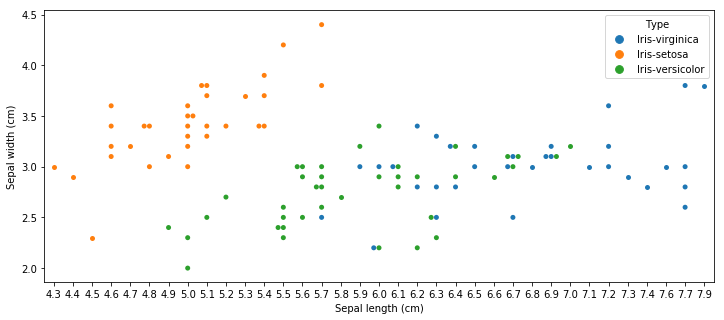

In [88]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig, ax = plt.subplots()
fig.set_size_inches((12, 5))
sns.swarmplot(x = 0, y = 1, hue = 4, data = pd.concat([train_X, train_y], axis = 1), ax = ax)
ax.set_xlabel("Sepal length (cm)")
ax.set_ylabel("Sepal width (cm)")
ax.get_legend().set_title("Type")

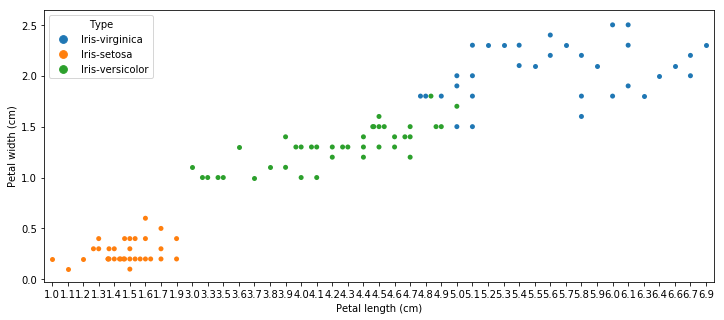

In [89]:
fig, ax = plt.subplots()
fig.set_size_inches((12, 5))
sns.swarmplot(x = 2, y = 3, hue = 4, data = pd.concat([train_X, train_y], axis = 1), ax = ax)
ax.set_xlabel("Petal length (cm)")
ax.set_ylabel("Petal width (cm)")
ax.get_legend().set_title("Type")

From the above, it could be seen that the best differentiating factors are petal length and width. It is worth noting that *Iris-setosa* has the smallest petals (in both dimensions) followed by *Iris-versicolor* and *Iris-virginica* has the biggest petals. At the same time, *Iris-setosa* can boast wider sepals (but they are still short), while *Iris-versicolor* and *Iris-virginica* has approximately the same sepal width, but sepals of *Iris-virginica* are longer. 

Below is a simple application of a Decision Tree Classifier (from *sklearn* library). I achieved the accuracy of almost 93%, which might be good enough already.

In [90]:
from sklearn import tree
dec_tree_classif = tree.DecisionTreeClassifier()
dec_tree_classif.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [91]:
from sklearn.metrics import accuracy_score
predicted = dec_tree_classif.predict(test_X)
accuracy_score(test_y, predicted)

0.9333333333333333

In [93]:
dec_tree_classif.feature_importances_

array([0.02388752, 0.02579853, 0.93120393, 0.01911002])

From the above, we can see that for a Decision Tree Classifier, none of the sepal characteristics matters a lot. The most differentiating factor is petal length. <br />
Let us try a different type of classifier (K-nearest neighbors) and see if cross-validation will improve our accuracy score. 

In [96]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_X, train_y)
predicted = knn.predict(test_X)
accuracy_score(test_y, predicted)

0.9555555555555556

Our accuracy with a randomly picked number of neighbors is 95.6%. Let us try and see if cross-validation might help us to improve even further. 

In [127]:
from sklearn.model_selection import GridSearchCV
n_fold = 3
param_list = range(1, 21)
param_grid = {'n_neighbors' : param_list}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, param_grid, cv = n_fold, scoring = 'accuracy')
clf.fit(train_X, train_y)

GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 21)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [128]:
print(clf.best_score_)
print(clf.best_estimator_)

0.9714285714285714
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')


Eventually, we ended up with the same cross-validated number of neighbors, which is 3. 

This concludes this project. This project explored a small dataset (of only 150 data points) with an attempt to classify different species of Iris based on a few features (sepal and petal dimensions). We have explored the data, visualized it (and we could see some patterns, e.g. petal dimensions are much more useful for differentiation) and trained two models (Decision Tree and Cross-Validated KNN) based on this data. 